## The Exploit
---

Avi Eisenberg gives an extensive interview dated October 28, 2022, where he describes his trading strategy which absorbed $116M in 1 day and bankrupted a DAO known as Mango Markets.  He also discusses his attempt to remit value back to users who could not withdraw deposits.

Interview Link:

https://www.youtube.com/watch?v=e-y4WmrndQ4

The analyses in this project will have no effect on other "real hacks" like the bridge security attack on Wormhole in February 2022.

Data Download Link:

https://coincodex.com/crypto/mango-markets/historical-data/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv('mango-markets_2018-01-20_2023-01-19.csv')
x['Date'] = pd.to_datetime(x['Date'])
x = x.set_index('Date')
x = x.sort_index()

# Normalise the data between 0 and 1
# for market cap and volume
x['Market Cap'] = (x['Market Cap'] - x['Market Cap'].min()) / (x['Market Cap'].max() - x['Market Cap'].min())
x['Volume'] = (x['Volume'] - x['Volume'].min()) / (x['Volume'].max() - x['Volume'].min())

### What is Mango Markets?

From the docs:

Mango Markets provides a single venue to lend, borrow, swap, and leverage-trade crypto assets through a powerful risk engine.

    * Earn interest on deposits
    * Cross-Margin / Cross-Collateralised
    * Decentralised

Mango Markets Documentation:

https://docs.mango.markets/

Mango Markets is built on the Solana blockchain and utilises Serum DEX for spot margin trading while perpetual futures are traded on Mango Markets' own order book. Mango Markets is governed by MNGO token holders via the Mango Decentralized Autonomous Organization (DAO).

There is still one massive holder with ~20x the amount of MNGO as the next biggest wallet.  It is unclear if this is Eisenberg, the MNGO Upgrade Committee, or somebody else.

![Current MNGO Holders](holders.png)

A 4th version of Mango Markets is in development, but a release date has not been suggested.

### What are "perps"?

From the Mango Markets docs:

"Perpetuals allow initial leverage of up to 10x, and maintenance leverage of 20x. If the value of your position (or collateral) falls and your leverage exceeds 20x, your account will be eligible for liquidation."

Perps are perpetual futures from a protocol that allows for high performance trades with no intermediaries or custodians, with options for offering liquidity or leverage on a variety of assets.

Perps Documentation:

https://docs.perp.com/

### The Price Data

The mountainous region on the left is what normal trading looks like.  The ups and downs are relevant to the disparities among the prices.  The spike on the right is the Mango Markets Fiasco. Not hard to detect if it happens slowly.  Solana is known for being swift.

There are tiered scale benefits on the taker fee scheme, there is a fixed low fee for the maker rate, and borrowing and lending are free.  In essence, Eisenberg was completely valid in his statements about trading strategy.

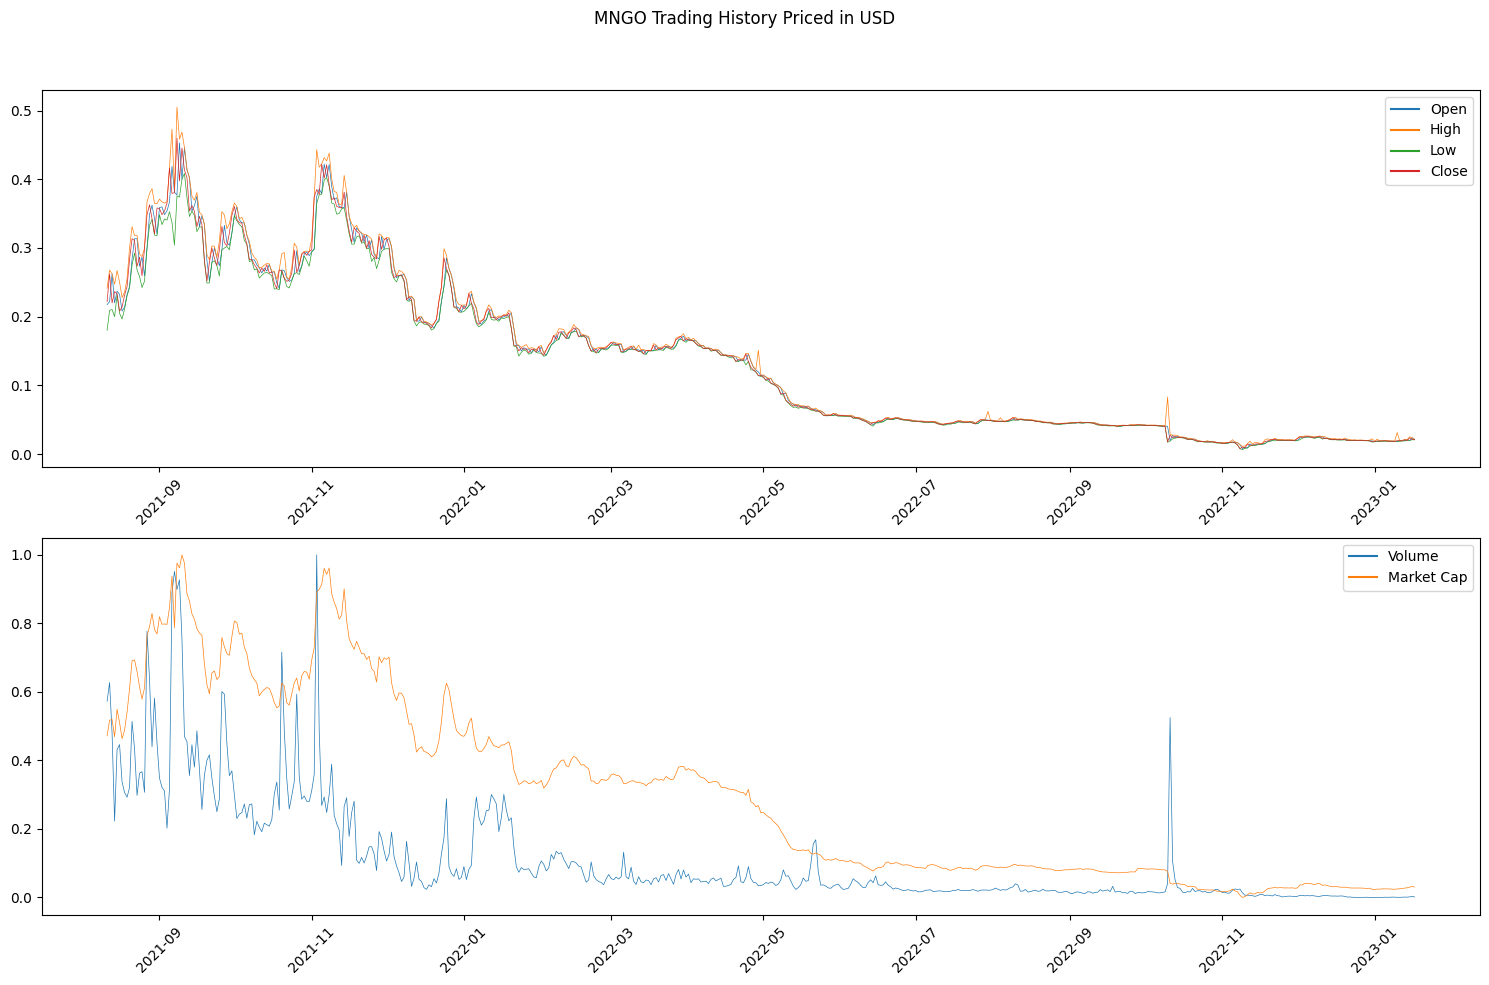

In [2]:
def plot_price_info(df, title):
    # Plot the data
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    ax[0].plot(df['Open'], label='Open')
    ax[0].plot(df['High'], label='High')
    ax[0].plot(df['Low'], label='Low')
    ax[0].plot(df['Close'], label='Close')
    ax[1].plot(df['Volume'], label='Volume')
    ax[1].plot(df['Market Cap'], label='Market Cap')
    
    # Visual tweaks
    ax[0].legend(['Open', 'High', 'Low', 'Close'])
    ax[1].legend(['Volume', 'Market Cap'])
    fig.suptitle(title)
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=45)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.style.use('dark_background')
    # thin lines
    for ax in fig.axes:
        for line in ax.get_lines():
            line.set_linewidth(0.5)
    
    plt.show()


plot_price_info(x, "MNGO Trading History Priced in USD")

By making a big splash with these perpetual futures, one can borrow on unrealized gains (specifically, withdrawals in currencies not under attack).  Eisenberg held a couple of accounts with around $5M each and he drove up the price by purchasing back and forth bweteen these accounts and borrowing on the margins.

He has hinted that his team had some tricks for getting their transactions processed first.  It was maybe overpowered hardware programmed in a low-level language, extremely low-latency connections, or massive unmatchable gas fees.

From this article:

https://www.coindesk.com/consensus-magazine/2022/12/30/the-impact-of-avraham-eisenbergs-case-on-the-future-of-crypto/

'Eisenberg’s operation was not exactly a surprise, as the risks of such attacks on decentralized collateralized lending are well known and Eisenberg did not invent this strategy. Sam Bankman-Fried, the ex-CEO of FTX, even tweeted his own prescient observations of the danger of using an illiquid token such as MNGO as collateral. Weeks later, the SEC cited these tweets as evidence that SBF “knew, or was reckless in not knowing, that by not mitigating for the impact of large and illiquid tokens posted as collateral by Alameda, FTX was engaging in precisely the same conduct, and creating the same risk, that he was warning against” with Mango.'

Identical language appears in the statement from the case being levied by the SEC this week.

Official SEC Statement dated January 23, 2023:

https://www.sec.gov/litigation/litreleases/2023/lr25623.htm

![Eisenberg on Zhong](avi_on_zhong.png)

This tweet from November 7 was made in reference to the justice.gov release statement about their historic seizure of over 50k BTC a year before, available here: 

https://www.justice.gov/usao-sdny/pr/us-attorney-announces-historic-336-billion-cryptocurrency-seizure-and-conviction

For the purposes of creating a strategy to detect or combat this, we should take the following statements as functionally true:

His team did not implement any exploits on the protocol, they did not coerce anybody to act on their behalf, and they did not engage in any form of cybersecurity gotcha.  They used the platform exactly as directed.

#### How to choose an economic target?

Eisenberg outlines his approach a when asked if his actions fit with the intent of the developers.

He states that their intent can never be perfectly clear, and figuring that out is not just about going through the documentation.  You must also go through the source code to see if the tool lines up with the way it is supposed to function.

The acount that accepted the value that liquidated the platform was associated with Eisenberg's discord handle ponzishorter.eth, which is a big clue toward what he calls a beneficial trading strategy.

He probably picked MNGO because trading volume across the platform had sunk to a base level for a long time, indicating scammable traders who were for some reason still present.  There were still many holdout types waiting for the price to explode back to previous levels.  Perhaps these were mostly the dev team.  The timing may have been related to the security audit released September 02.

He examined the docs and the source code to ensure that there were combined borrowing and lending operations, and that liquidity was available.

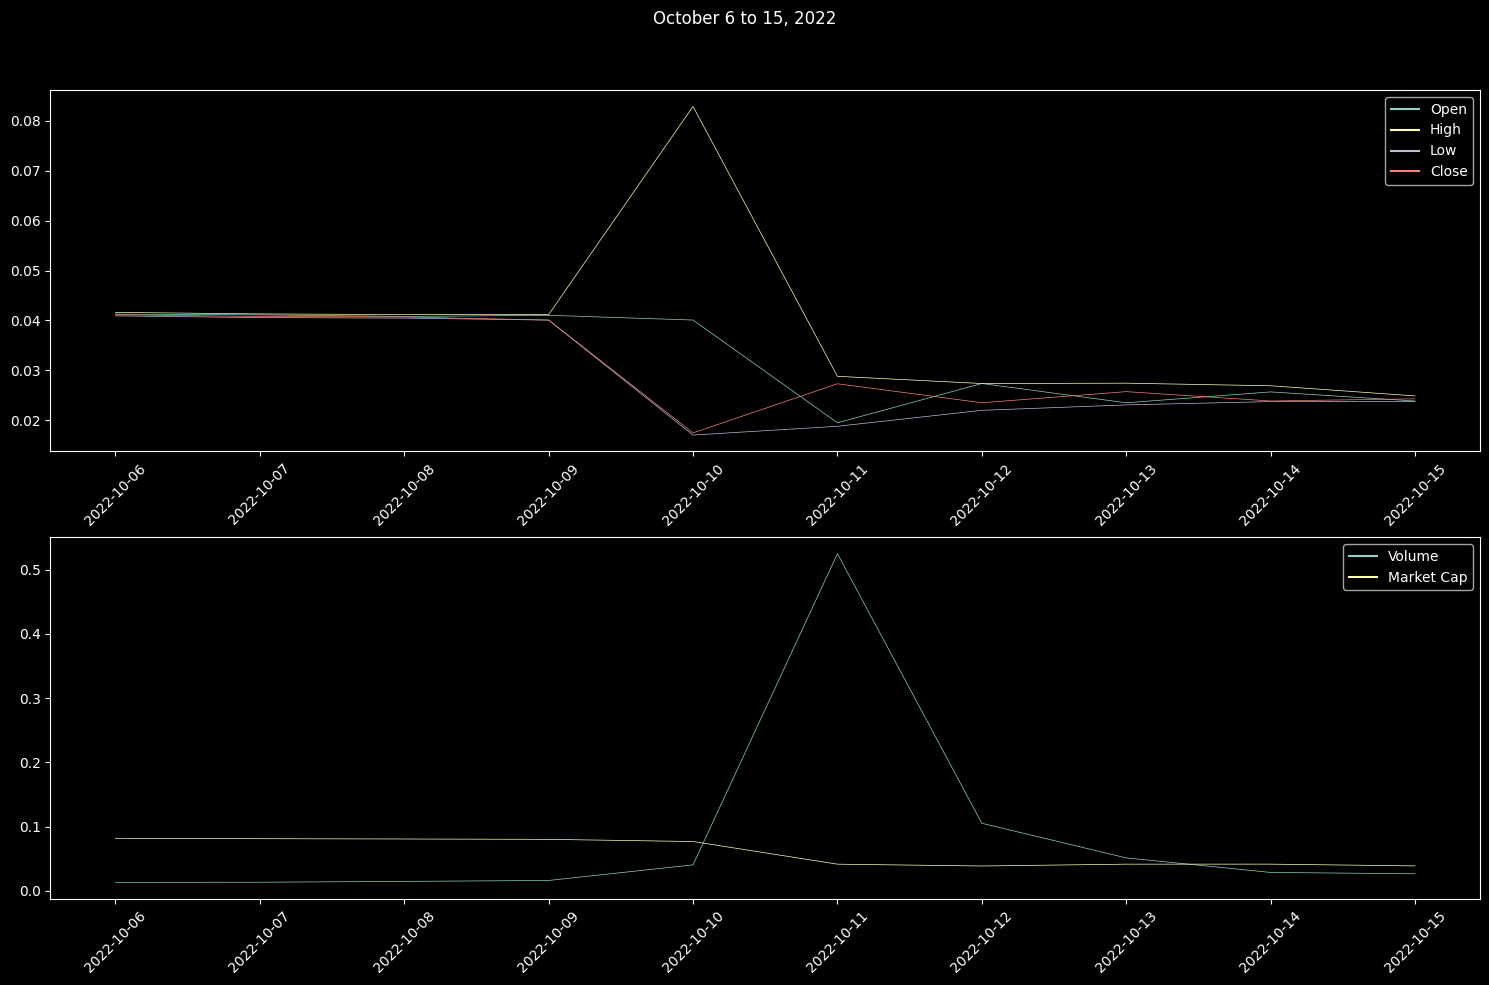

In [3]:
plot_price_info(x['2022-10-06':'2022-10-15'], "October 6 to 15, 2022")

On October 10, he drove up the price, getting benefits in maker fees for being large scale, and the exponential increase of his trades on loans can be seen inverted in the market cap!  I wish I had access to finer data.

Then on October 11, the price naturally levels out when all the liquidity has been taken out on loan and removed from the system. Data with higher definition is difficult to find, mangolorians stops offering  detailed information after October 14.

### 02 September 2022 Security Audit

Neodyme Mango Markets Security Audit:
https://1610690202-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F-MVID3wF97zSdsTruiIC%2Fuploads%2FNJ586BURL5wI6mPgIX05%2FMango%20Markets%20audit.pdf?alt=media&token=03d4956b-6f29-4371-8d6a-b2c432de7949

Ruling out common classes of Solana contract vulnerabilities, such as:

* Missing ownership checks,
* Missing signer checks,
* Signed invocation of unverified programs,
* Solana account confusions,
* Re-initiation with cross-instance confusion,
* Missing freeze authority checks,
* Insufficient SPL token account verification,
* Missing rent exemption assertion,
* Casting truncation,
* Arithmetic over- or underflows,
* Numerical precision errors.

Other checks:

* Checking for unsafe design that might lead to common vulnerabilities being introduced in the
future,
* Checking for any other, as-of-yet unknown classes of vulnerabilities arising from the structure of
the Solana blockchain,
* Ensuring that the contract logic correctly implements the project specifications,
* Examining the code in detail for contract-specific low-level vulnerabilities,
* Ruling out denial-of-service attacks,
* Ruling out economic attacks,
* Checking for instructions that allow front-running or sandwiching attacks,
* Checking for rug-pull mechanisms or hidden backdoors,
* Checking for replay protection.

The findindings were all resolved or acknowledged:

* Orderbook sides were not sufficiently verified
* Perp value calculation can overflow
* Missing vault check in resolve_token_bankruptcy
* Deposit does not trigger interest update
* RootBankCache timeout inconsistency

Nothing listed concerns market risk.  These are risks to infrastructure and credit.  For our purposes, the exploit we have seen was of a purely economic nature, and it did not take advantage of any technical issue with the system.